In [1]:
# https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction/data
# https://datascience.stackexchange.com/questions/78146/does-label-encoding-an-entire-dataset-cause-data-leakage

In [2]:
# https://www.youtube.com/watch?v=WLwjvWq0GWA

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [10]:
import pickle

# 1. Load data

In [11]:
df = pd.read_csv("train.csv")

In [12]:
df.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
294992,294993,Male,64,1,8.0,1,1-2 Year,No,46583.0,124.0,198,0
101114,101115,Male,48,1,8.0,0,1-2 Year,Yes,26122.0,124.0,50,0
374670,374671,Male,22,1,28.0,1,< 1 Year,No,48389.0,152.0,111,0
359338,359339,Male,24,1,47.0,1,< 1 Year,No,49176.0,152.0,147,0
10097,10098,Female,71,1,28.0,1,1-2 Year,No,35360.0,26.0,147,0


In [13]:
df.shape

(381109, 12)

# 2. Check data quality

In [14]:
# data type

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [16]:
df['Region_Code'] = df['Region_Code'].astype(int)
df['Region_Code'] = df['Region_Code'].astype(str)

In [17]:
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(int)
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(str)

In [18]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170.0,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016.0,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118.0,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617.0,124,74,0


In [19]:
# unique value

In [20]:
df.shape

(381109, 12)

In [21]:
# missing value

In [22]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# 3. Exploratory data analysis (EDA)

In [23]:
# list of columns by types

In [24]:
id_col = ['id']

In [25]:
target_col = ['Response']

In [26]:
cat_col = ['Gender','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel']

In [27]:
num_col = ['Age','Annual_Premium','Vintage']

In [28]:
# target

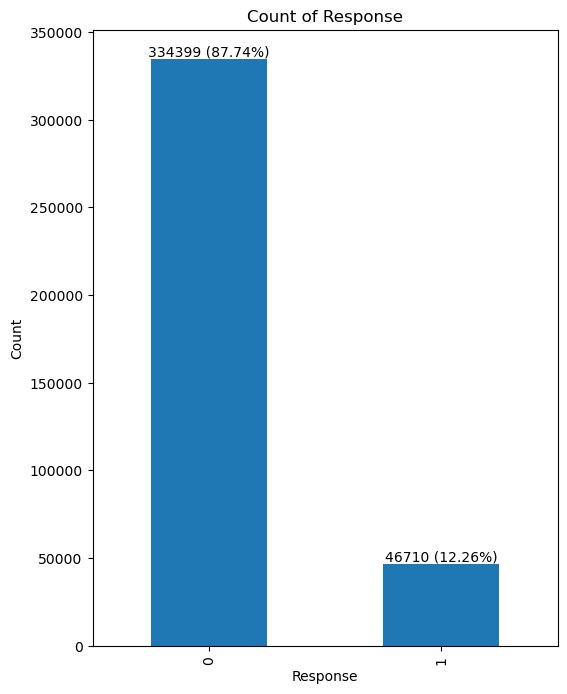

In [29]:
for column in target_col:
    category_counts = df[column].value_counts()
    total_count = len(df[column])
    plt.figure(figsize=(6, 8))
    ax = category_counts.plot(kind='bar')
    for i, count in enumerate(category_counts):
        percentage = (count / total_count) * 100
        ax.annotate(f'{count} ({percentage:.2f}%)', xy=(i, count), ha='center', va='bottom')
    
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count of {column}')
    plt.show()

In [30]:
# categorical features

In [31]:
df[cat_col].describe(include='object')

,Gender,Region_Code,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
count,381109,381109,381109,381109,381109
unique,2,53,3,2,155
top,Male,28,1-2 Year,Yes,152
freq,206089,106415,200316,192413,134784


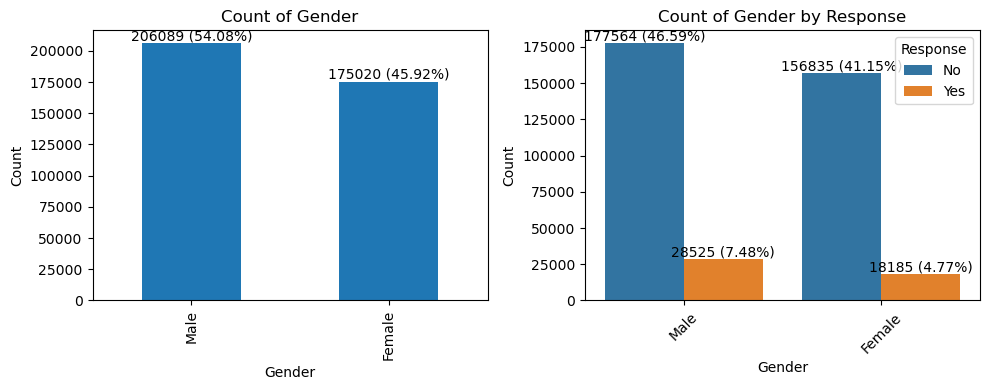

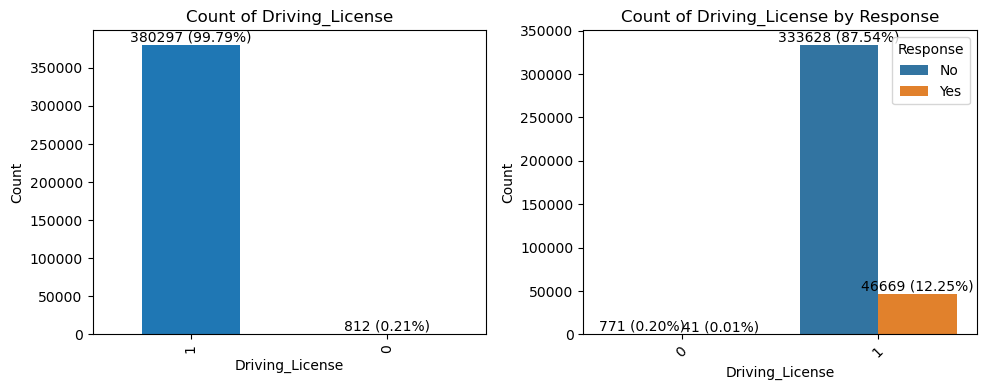

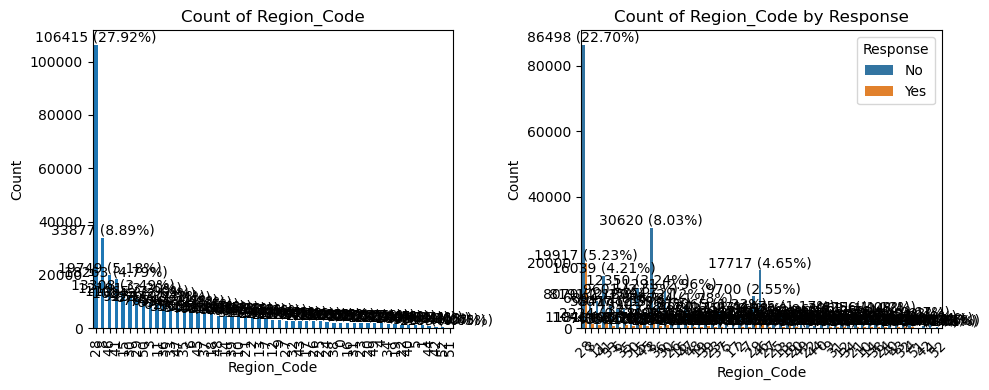

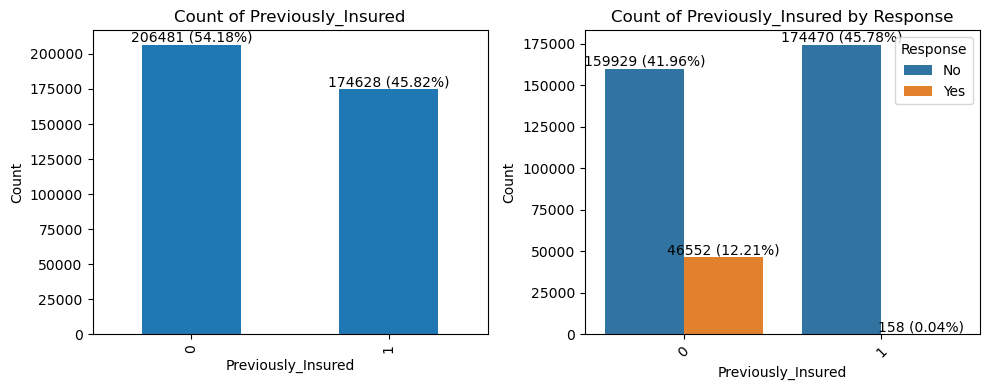

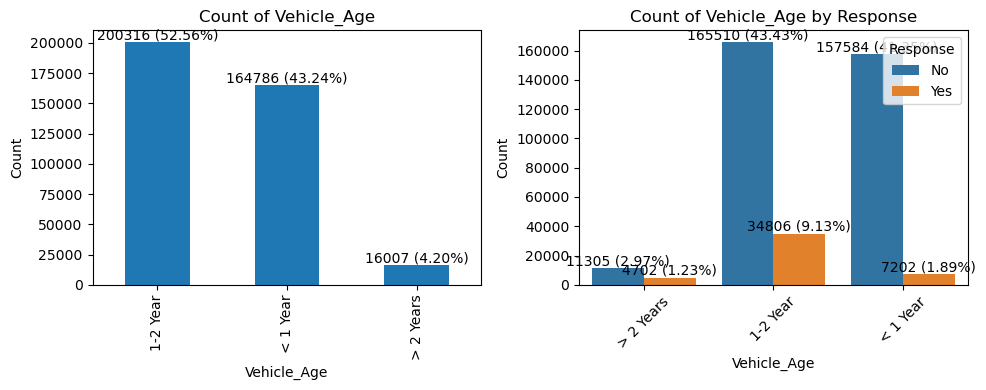

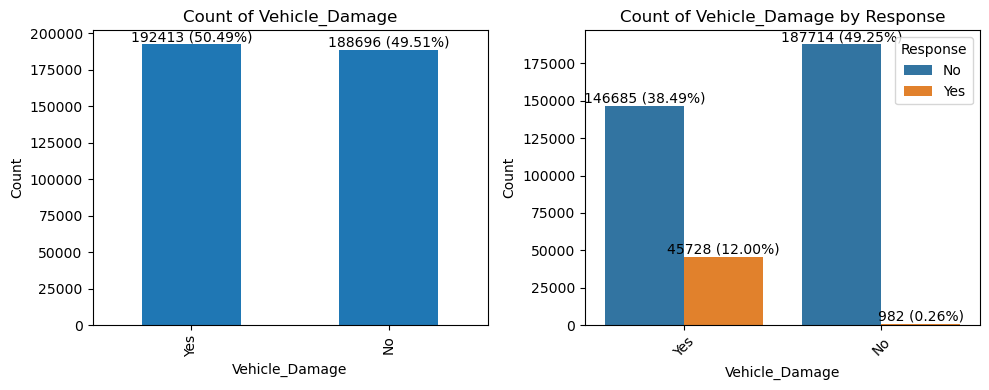

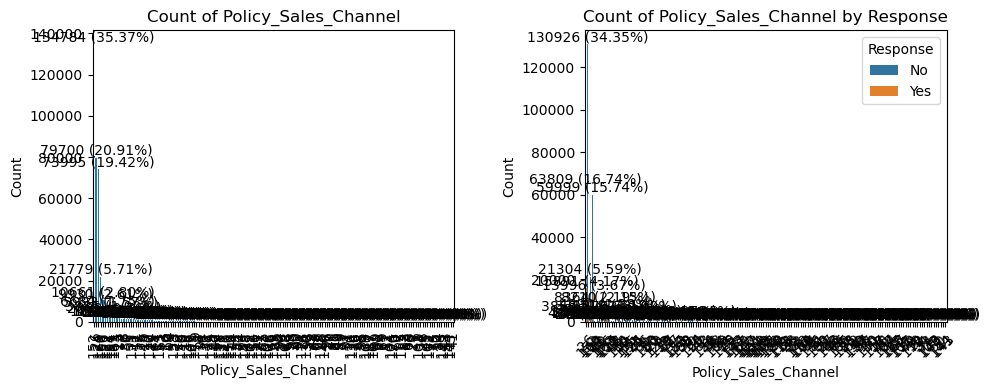

In [32]:
for column in cat_col:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Left subplot - Bar chart
    category_counts = df[column].value_counts()
    total_count = len(df[column])
    ax = category_counts.plot(kind='bar', ax=axes[0])
    for i, count in enumerate(category_counts):
        percentage = (count / total_count) * 100
        ax.annotate(f'{count} ({percentage:.2f}%)', xy=(i, count), ha='center', va='bottom')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].set_title(f'Count of {column}')
    
    # Right subplot - Count plot with hue='Response' and percentages
    sns.countplot(data=df, x=column, hue='Response', ax=axes[1])
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')
    axes[1].set_title(f'Count of {column} by Response')
    axes[1].legend(title='Response', loc='upper right', labels=['No', 'Yes'])
    axes[1].tick_params(axis='x', rotation=45)
    
    # Annotate bars with percentages in the right subplot
    for bar in axes[1].patches:
        total_height = bar.get_height()
        percentage = (total_height / total_count) * 100
        text_x = bar.get_x() + bar.get_width() / 2
        text_y = total_height
        axes[1].annotate(f'{int(total_height)} ({percentage:.2f}%)',
                         (text_x, text_y),
                         ha='center',
                         va='bottom')

    plt.tight_layout()
    plt.show()

In [33]:
# numerical features

In [34]:
df[num_col].describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


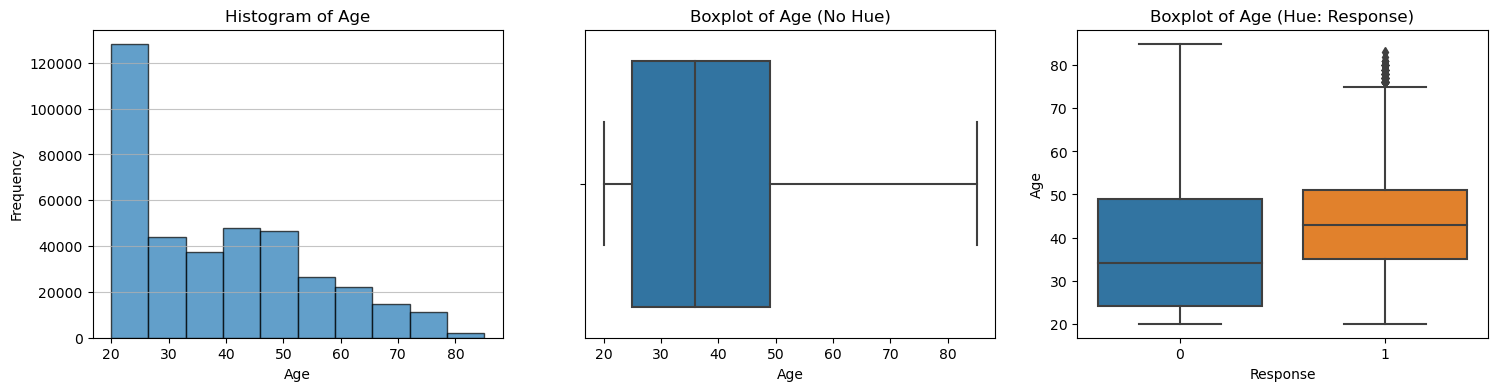

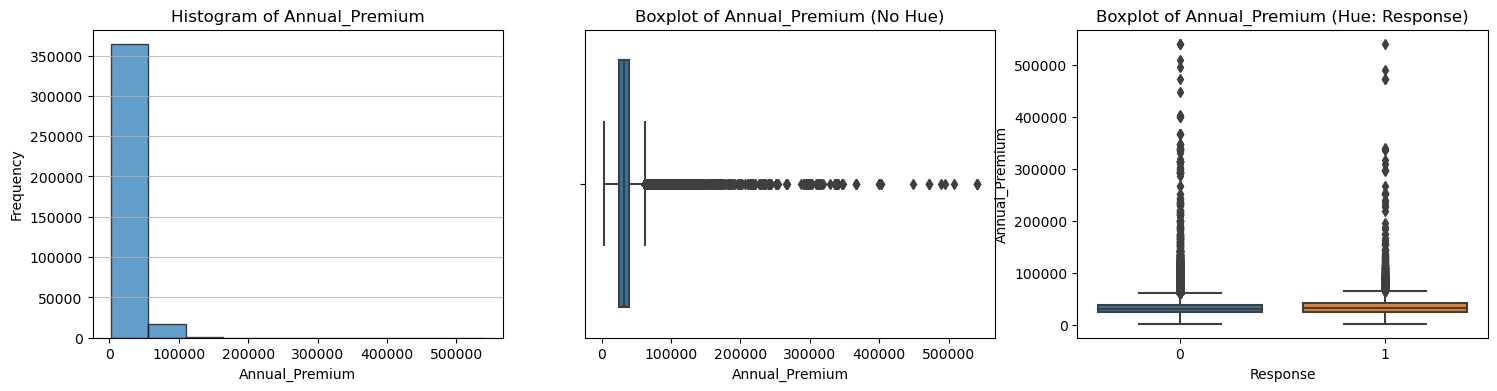

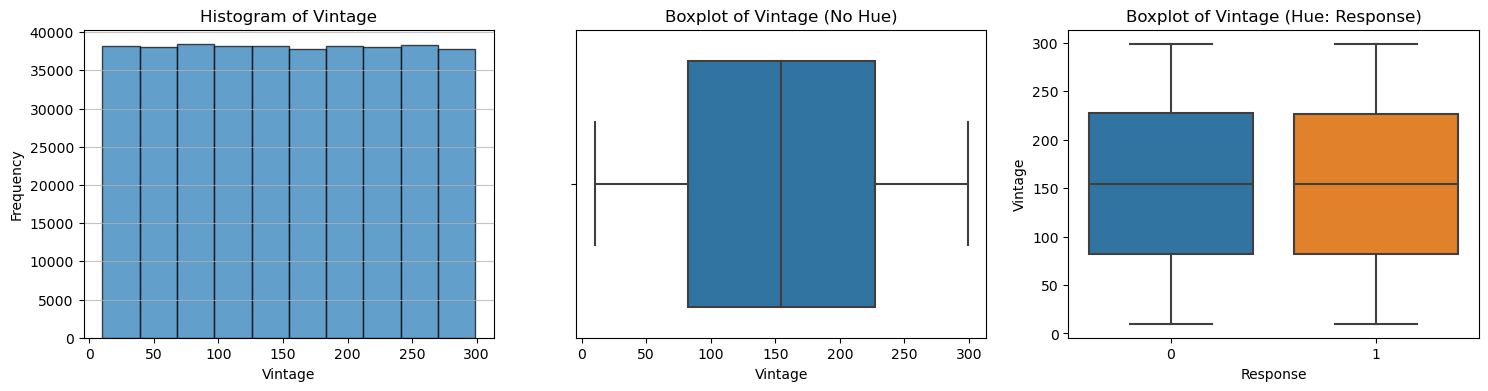

In [35]:
for column_name in num_col:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    
    # Create a histogram
    ax1.hist(df[column_name], bins=10, edgecolor='black', alpha=0.7)
    ax1.set_title(f'Histogram of {column_name}')
    ax1.set_xlabel(column_name)
    ax1.set_ylabel('Frequency')
    ax1.grid(axis='y', alpha=0.75)
    
    # Create a boxplot without hue
    sns.boxplot(x=df[column_name], ax=ax2)
    ax2.set_title(f'Boxplot of {column_name} (No Hue)')
    ax2.set_xlabel(column_name)
    
    # Create a boxplot with hue='Response'
    sns.boxplot(x='Response', y=column_name, data=df, ax=ax3)
    ax3.set_title(f'Boxplot of {column_name} (Hue: Response)')
    ax3.set_xlabel('Response')
    ax3.set_ylabel(column_name)
    
    plt.show()

# 4. Feature engineering

In [36]:
# Gender

In [37]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [38]:
# Region code

In [39]:
region_code_encoder = OneHotEncoder(handle_unknown='ignore')

In [40]:
region_code_encoded = region_code_encoder.fit_transform(df[['Region_Code']]).toarray()
region_code_encoded_df = pd.DataFrame(region_code_encoded, columns=region_code_encoder.get_feature_names_out(['Region_Code']))
df = pd.concat([df, region_code_encoded_df], axis=1).drop('Region_Code', axis=1)

In [41]:
# Vehicle age

In [42]:
vehicle_age_encoder = OneHotEncoder(handle_unknown='ignore')

In [43]:
vehicle_age_encoded = vehicle_age_encoder.fit_transform(df[['Vehicle_Age']]).toarray()
vehicle_age_encoded_df = pd.DataFrame(vehicle_age_encoded, columns=vehicle_age_encoder.get_feature_names_out(['Vehicle_Age']))
df = pd.concat([df, vehicle_age_encoded_df], axis=1).drop('Vehicle_Age', axis=1)

In [44]:
# Vehicle damage

In [45]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)

In [46]:
# Policy dales channel

In [47]:
policy_sales_channel_encoder = OneHotEncoder(handle_unknown='ignore')

In [48]:
policy_sales_channel_encoded = policy_sales_channel_encoder.fit_transform(df[['Policy_Sales_Channel']]).toarray()
policy_sales_channel_encoded_df = pd.DataFrame(policy_sales_channel_encoded, columns=policy_sales_channel_encoder.get_feature_names_out(['Policy_Sales_Channel']))
df = pd.concat([df, policy_sales_channel_encoded_df], axis=1).drop('Policy_Sales_Channel', axis=1)

In [49]:
# drop customerID

In [50]:
df.drop(columns = 'id', inplace = True)

In [51]:
# check correlation

In [52]:
corr = df.corr()

In [ ]:
corr_table = corr['Response'].sort_values(ascending=False)

In [ ]:
corr_table

Response                    1.000000
Vehicle_Damage              0.354400
Vehicle_Age_1-2 Year        0.164317
Region_Code_28              0.122609
Policy_Sales_Channel_26     0.120461
                              ...   
Region_Code_50             -0.030349
Policy_Sales_Channel_160   -0.075639
Vehicle_Age_< 1 Year       -0.209878
Policy_Sales_Channel_152   -0.211898
Previously_Insured         -0.341170
Name: Response, Length: 219, dtype: float64

In [ ]:
corr_abs_table = corr['Response'].abs().sort_values(ascending=False)

In [ ]:
corr_abs_table

Response                    1.000000
Vehicle_Damage              0.354400
Previously_Insured          0.341170
Policy_Sales_Channel_152    0.211898
Vehicle_Age_< 1 Year        0.209878
                              ...   
Policy_Sales_Channel_109    0.000168
Policy_Sales_Channel_103    0.000102
Policy_Sales_Channel_86     0.000083
Region_Code_52              0.000083
Policy_Sales_Channel_92     0.000059
Name: Response, Length: 219, dtype: float64

# 5. Model

In [57]:
# Train/Test/Validation Split

In [58]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [59]:
X_train = train_df.drop(columns=['Response'])
y_train = train_df['Response']

X_test = test_df.drop(columns=['Response'])
y_test = test_df['Response']

In [60]:
print(X_train.shape)
print(y_train.shape)
 
print(X_test.shape)
print(y_test.shape)

(304887, 218)
(304887,)
(76222, 218)
(76222,)


In [61]:
# LOGISTIC

In [62]:
logistic_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300],
    'penalty': ['l2'],
    'class_weight': ['balanced', None],
    'random_state': [42]
}

In [63]:
logistic = LogisticRegression(random_state=42)
logistic_random_search = RandomizedSearchCV(logistic, param_distributions=logistic_params, n_iter=10, cv=5, random_state=42, scoring='recall', n_jobs=-1)
logistic_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'class_weight': ['balanced', None],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l2'], 'random_state': [42],
                                        'solver': ['liblinear', 'lbfgs']},
                   random_state=42, scoring='recall')

In [64]:
logistic_random_search.best_score_

0.9396564737051065

In [65]:
logistic_best = logistic_random_search.best_estimator_

In [66]:
# SMOTE + LOGISTIC

In [67]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [68]:
logistic_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300],
    'penalty': ['l2'],
    'class_weight': ['balanced', None],
    'random_state': [42]
}

In [69]:
logistic = LogisticRegression(random_state=42)
logistic_smote_random_search = RandomizedSearchCV(logistic, param_distributions=logistic_params, n_iter=10, cv=5, random_state=42, scoring='recall', n_jobs=-1)
logistic_smote_random_search.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'class_weight': ['balanced', None],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l2'], 'random_state': [42],
                                        'solver': ['liblinear', 'lbfgs']},
                   random_state=42, scoring='recall')

In [70]:
logistic_smote_random_search.best_score_

0.9274971983563691

In [71]:
logistic_smote = logistic_smote_random_search.best_estimator_

In [72]:
# RUS + LOGISTIC

In [73]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [74]:
logistic_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300],
    'penalty': ['l2'],
    'class_weight': ['balanced', None],
    'random_state': [42]
}

In [75]:
logistic = LogisticRegression(random_state=42)
logistic_rus_random_search = RandomizedSearchCV(logistic, param_distributions=logistic_params, n_iter=10, cv=5, random_state=42, scoring='recall', n_jobs=-1)
logistic_rus_random_search.fit(X_train_rus, y_train_rus)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'class_weight': ['balanced', None],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l2'], 'random_state': [42],
                                        'solver': ['liblinear', 'lbfgs']},
                   random_state=42, scoring='recall')

In [76]:
logistic_rus_random_search.best_score_

0.9506280397175477

In [77]:
logistic_rus = logistic_rus_random_search.best_estimator_

# 6. Evaluation

In [78]:
y_pred = logistic_best.predict(X_test)
y_pred_smote = logistic_smote.predict(X_test)
y_pred_rus = logistic_rus.predict(X_test)

In [79]:
results_logistic = {
    'Model': ['Logistic', 'Logistic SMOTE', 'Logistic RUS'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_smote), accuracy_score(y_test, y_pred_rus)],
    'Precision': [precision_score(y_test, y_pred), precision_score(y_test, y_pred_smote), precision_score(y_test, y_pred_rus)],
    'Recall': [recall_score(y_test, y_pred), recall_score(y_test, y_pred_smote), recall_score(y_test, y_pred_rus)],
    'AUC-ROC': [roc_auc_score(y_test, logistic_best.predict_proba(X_test)[:, 1]), roc_auc_score(y_test, logistic_smote.predict_proba(X_test)[:, 1]), roc_auc_score(y_test, logistic_rus.predict_proba(X_test)[:, 1])]
}

In [80]:
results_df = pd.DataFrame(results_logistic)

In [81]:
results_df

,Model,Accuracy,Precision,Recall,AUC-ROC
0,Logistic,0.692399,0.281243,0.939830,0.851413
1,Logistic SMOTE,0.710385,0.287240,0.889741,0.842518
2,Logistic RUS,0.683398,0.276162,0.946340,0.848953


# 7. Save model

In [82]:
# encoder

In [83]:
filepath = f'./encoder model pickle/region_code_encoder.pickle'
with open(filepath, 'wb') as file:
    pickle.dump(region_code_encoder, file)

In [84]:
filepath = f'./encoder model pickle/vehicle_age_encoder.pickle'
with open(filepath, 'wb') as file:
    pickle.dump(vehicle_age_encoder, file)

In [85]:
filepath = f'./encoder model pickle/policy_sales_channel_encoder.pickle'
with open(filepath, 'wb') as file:
    pickle.dump(policy_sales_channel_encoder, file)

In [86]:
# prediction model

In [87]:
filepath = f'./prediction model pickle/logistic_rus_prediction.pickle'
with open(filepath, 'wb') as file:
    pickle.dump(logistic_rus, file)

# 8. Prediction

In [88]:
# import model

In [89]:
region_code_encoder = pickle.load(open('encoder model pickle/region_code_encoder.pickle', 'rb'))

In [90]:
vehicle_age_encoder = pickle.load(open('encoder model pickle/vehicle_age_encoder.pickle', 'rb'))

In [91]:
policy_sales_channel_encoder = pickle.load(open('encoder model pickle/policy_sales_channel_encoder.pickle', 'rb'))

In [92]:
logistic_rus = pickle.load(open('prediction model pickle/logistic_rus_prediction.pickle', 'rb'))

In [93]:
# mock data

In [94]:
df_prediction = pd.DataFrame({
    'Gender': ['Male'],
    'Age': [50],
    'Driving_License': ['Yes'],
    'Region_Code': ['28'],
    'Previously_Insured': ['Yes'],
    'Vehicle_Age': ['> 2 Years'],
    'Vehicle_Damage': ['Yes'],
    'Annual_Premium': [30000],
    'Policy_Sales_Channel': ['152'],
    'Vintage': [15]
})

In [95]:
df_prediction

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,50,Yes,28,Yes,> 2 Years,Yes,30000,152,15


In [96]:
# encode

In [97]:
df_prediction['Gender'] = df_prediction['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [98]:
df_prediction['Driving_License'] = df_prediction['Driving_License'].apply(lambda x: 1 if x == 'Yes' else 0)

In [99]:
df_prediction['Previously_Insured'] = df_prediction['Previously_Insured'].apply(lambda x: 1 if x == 'Yes' else 0)

In [100]:
df_prediction['Vehicle_Damage'] = df_prediction['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)

In [101]:
region_code_encoded = region_code_encoder.transform(df_prediction[['Region_Code']]).toarray()
region_code_encoded_df = pd.DataFrame(region_code_encoded, columns=region_code_encoder.get_feature_names_out(['Region_Code']))
df_prediction = df_prediction.join(region_code_encoded_df)
df_prediction = df_prediction.drop('Region_Code', axis=1)

In [102]:
vehicle_age_encoded = vehicle_age_encoder.transform(df_prediction[['Vehicle_Age']]).toarray()
vehicle_age_encoded_df = pd.DataFrame(vehicle_age_encoded, columns=vehicle_age_encoder.get_feature_names_out(['Vehicle_Age']))
df_prediction = df_prediction.join(vehicle_age_encoded_df)
df_prediction = df_prediction.drop('Vehicle_Age', axis=1)

In [103]:
policy_sales_channel_encoded = policy_sales_channel_encoder.transform(df_prediction[['Policy_Sales_Channel']]).toarray()
policy_sales_channel_encoded_df = pd.DataFrame(policy_sales_channel_encoded, columns=policy_sales_channel_encoder.get_feature_names_out(['Policy_Sales_Channel']))
df_prediction = df_prediction.join(policy_sales_channel_encoded_df)
df_prediction = df_prediction.drop('Policy_Sales_Channel', axis=1)

In [104]:
# predict

In [105]:
predictions = logistic_rus.predict(df_prediction)

In [106]:
df_prediction['predictions'] = predictions

In [107]:
if df_prediction['predictions'][0] == 1:
    print('Likely to buy')
else:
    print('Not likely to buy')

Not likely to buy
